KMENAS WITH SCIKITLEARN

In [37]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

In [38]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])
X

array([[  1. ,   2. ],
       [  1.5,   1.8],
       [  5. ,   8. ],
       [  8. ,   8. ],
       [  1. ,   0.6],
       [  9. ,  11. ]])

In [46]:
#plt.scatter(X[:, 0],X[:, 1], s=50, linewidths = 5, zorder = 10)
#plt.show()



In [47]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
centroids = clf.cluster_centers_
labels = clf.labels_
clf.predict([[5.,7]])


array([0])

In [42]:
print(centroids)
print(labels)

[[ 7.33333333  9.        ]
 [ 1.16666667  1.46666667]]
[1 1 0 0 1 0]


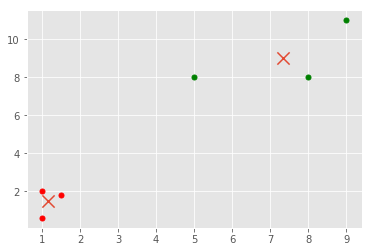

In [43]:
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

HANDLING NON-NUMERIC DATA WITH TITANICE DATASET

-------------------------------------TITANICE DATASET------------------------------------

In [2]:
#https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd

F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_excel('titanic.xls')
#print(df.head())
#df.drop(['body','name'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    0.0   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    0.0   
2   2.0000      1      2  113781  151.5500  C22 C26        S    0    0.0   
3  30.0000      1      2  113781  151.5500  C22 C26        S    0  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S    0    0.0   

                         home.dest  
0                     St 

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [4]:
def handle_non_numerical_data(df):
    columns = df.columns.values #['pclass' 'survived' 'sex' .....' 'fare' 'cabin' 'embarked' 'boat' 'home.dest']
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [5]:
df = handle_non_numerical_data(df)
print(df.head())

   pclass  survived  name  sex      age  sibsp  parch  ticket      fare  \
0       1         1   149    0  29.0000      0      0     742  211.3375   
1       1         1  1136    1   0.9167      1      2     499  151.5500   
2       1         0   438    0   2.0000      1      2     499  151.5500   
3       1         0   398    1  30.0000      1      2     499  151.5500   
4       1         0  1259    0  25.0000      1      2     499  151.5500   

   cabin  embarked  boat   body  home.dest  
0    161         1     2    0.0        263  
1     90         1    17    0.0         64  
2     90         1     0    0.0         64  
3     90         1     0  135.0         64  
4     90         1     0    0.0         64  


In [6]:
c=([100,100],[0,0],[-100,-100])
n = preprocessing.scale(c)
print(n)

[[ 1.22474487  1.22474487]
 [ 0.          0.        ]
 [-1.22474487 -1.22474487]]


In [7]:
df.drop(['sex','boat','name','home.dest','sibsp'], 1, inplace=True)
X = np.array(df.drop(['survived'], 1).astype(float))
#print(X)
X = preprocessing.scale(X)
#print(X)
y = np.array(df['survived'])


clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.3093964858670741


In [10]:
a = np.array([1,4,6,7,8])

In [11]:
a

array([1, 4, 6, 7, 8])

In [12]:
a.reshape(-1,len(a))

array([[1, 4, 6, 7, 8]])